# Building Artificial Neural Network

- MNIST Dataset

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Step 2: Load and preprocess the MNIST dataset from mnist.csv

In [2]:
mnist_df = pd.read_csv('mnist.csv')

In [3]:
# Split the dataset into features (pixels) and labels (target)

features = mnist_df.drop('label', axis=1)
labels = mnist_df['label']

In [4]:
# Normalize pixel values to be in the range [0, 1]

features = features / 255.0

In [5]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [6]:
# Reshape the features to match the expected input shape

features = features.reshape(-1, 28, 28)

In [7]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)

### Step 3: Build the ANN model

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),   # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

### Step 4: Compile the model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

### Step 5: Train the model

In [10]:
model.fit(features, labels, epochs = 5)  # You can adjust the number of epochs

Epoch 1/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3336 - accuracy: 0.9025
Epoch 2/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1622 - accuracy: 0.9512
Epoch 3/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1230 - accuracy: 0.9632
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0964 - accuracy: 0.9705
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0835 - accuracy: 0.9745


### Step 6: Make predictions

In [11]:
predictions = model.predict(features)  # Use the same dataset for predictions (not recommended for real-world use)

1313/1313 [==============================] - 2s 2ms/step


### Step 7: Visualize the results

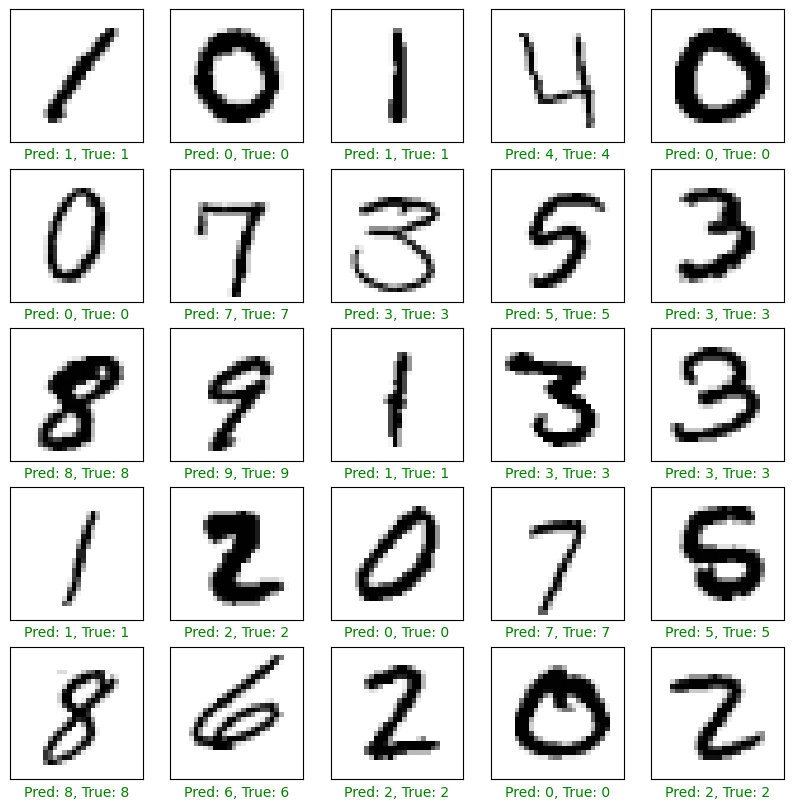

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()